<a href="https://colab.research.google.com/github/RodYazdan/sales_predictions/blob/master/Hirad_Yazdankhah_Project_1_Part_5_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project1 - (NOTE : PART 5 on MACHINE LEARNING IS IN SECTION BELOW)
#Hirad Yazdankhah
#June 23 2022

## 0-Importing Data

In [114]:
import numpy as np
import pandas as pd
food_filename = '/content/sales_predictions.csv'
sales_data_predictions =pd.read_csv(food_filename)
sd=sales_data_predictions
sd.head()
# Note sd is used for Sales Data manipulation in 1st month of course
# df is used for the machine learning part to ensure we start with a fresh data and 
# avoid and leakage
df=sd.copy()

##1) How many rows and columns?

In [115]:
sd.shape

(8523, 12)

##2) What are the datatypes of each variable?

In [116]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##3) Are there duplicates? If so, drop any duplicates.

In [117]:
sd.duplicated().sum()
#sd[sd.duplicated(keep=False)] ===>used to remove duplicates if there were duplicates

0

>No there are no duplicates !

##4) Identify missing values.

In [118]:
sd.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [119]:
missing_vals = sd.isna().sum()
missing_vals[missing_vals>0]
sd['Item_Weight'].fillna(value=sd['Item_Weight'].mean(),inplace=True)
sd = sd.drop(columns=['Outlet_Size'])
sd.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


There are 8523 rows in total. From theses 1463 values are missing numerical values for weight and 2410 categories ( ex: medium,high etc) for Outlet size . Since there is still a significant number of rows that have valuable information I have decided replace the values of the numerical missing data with the average . However almost 30 % of the Outlet size data is missing so I have decided to delete that coulumns.

##6) Confirm that there are no missing values after addressing them.

In [120]:
#missing_vals = sd.isna().sum()
#missing_vals[missing_vals>0]
sd.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [121]:
sd.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [122]:
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('LF', 'Low Fat')
sd.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    Low Fat           0.000000         Soft Drinks            141.6154  OUT045             2002                       Tier 2                Supermarket Type1  3829.0158            1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [123]:
sd['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [124]:
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('reg', 'Regular')
sd['Item_Fat_Content'] = sd['Item_Fat_Content'].replace('low fat', 'Low Fat')
sd['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

##8) For any numerical columns, obtain the summary statistics of each (min, max, mean)


In [125]:
sd.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


#====================================================================
#Project1 - Part 3 - Plotting
#Hirad Yazdankhah
#June 9 2022
#====================================================================

# 1- Histogram to view the distributions of various features in your dataset.

In [126]:
import pandas as pd
# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1A) Histogram of Number of Items Sold vs. Type of Of item Sold

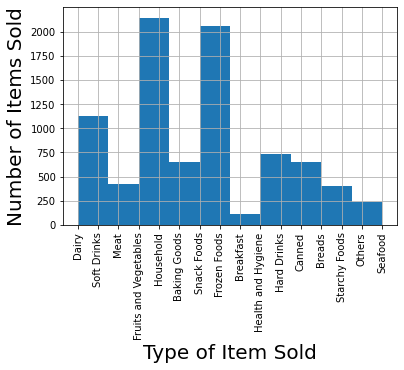

In [127]:
sd['Item_Type'].hist()
plt.xticks(rotation = 90)
plt.xlabel('Type of Item Sold', fontsize = 20);
plt.ylabel('Number of Items Sold', fontsize = 20);
#plt.legend(['Percentage of Cat Owners','Percentage of Dog Owners'])

## 1B) Histogram of Number of Items Sold vs. Item's Fat Content

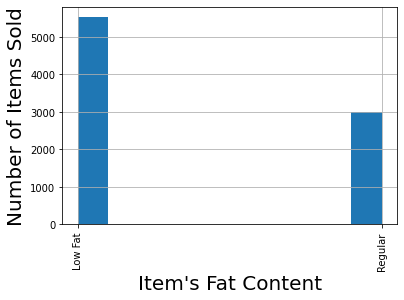

In [128]:
sd['Item_Fat_Content'].hist()
plt.xticks(rotation = 90)
plt.xlabel("Item's Fat Content", fontsize = 20);
plt.ylabel('Number of Items Sold', fontsize = 20);
#plt.legend(['Percentage of Cat Owners','Percentage of Dog Owners'])

# 2- Boxplot to view statistical summaries of various features in your dataset.

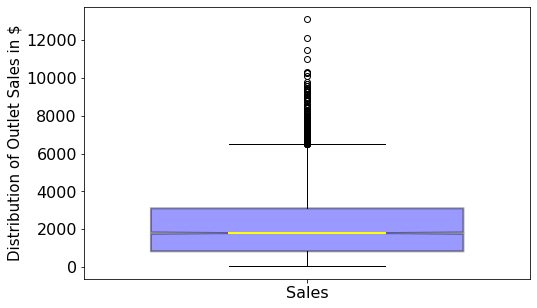

In [129]:
sales= sd['Item_Outlet_Sales'] 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))

boxplots = axes.boxplot([sales],
           notch = True,
           labels=['Sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Label formats for plot
boxplot1 = boxplots['boxes'][0]
#boxplot1.set_facecolor('orange')
#plt.xlabel('Animals', fontsize = 20);
plt.ylabel('Distribution of Outlet Sales in $', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

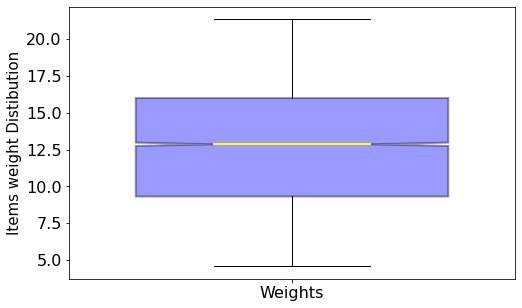

In [130]:
sales= sd['Item_Weight'] 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))

boxplots = axes.boxplot([sales],
           notch = True,
           labels=['Weights'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4)
          );
# Label formats for plot
boxplot1 = boxplots['boxes'][0]
plt.ylabel('Items weight Distibution', fontsize = 15);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

#3-Heatmap of the correlation between features.

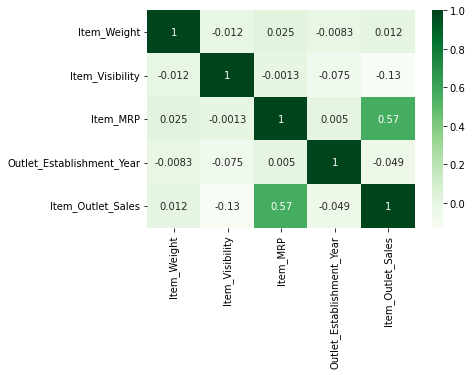

In [131]:
corr = sd.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Greens', annot = True)

#====================================================================
#Project1 - Part 4 - Data Visualizations 
#Hirad Yazdankhah
#June 16 2022
#====================================================================

### INSTRUCTIONS :Create a minimum of two data visualizations that help others understand trends in the data (explanatory data analysis).Since these graphs are for reporting purposes, make sure they look nice by including titles, legends, etc.

In [132]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


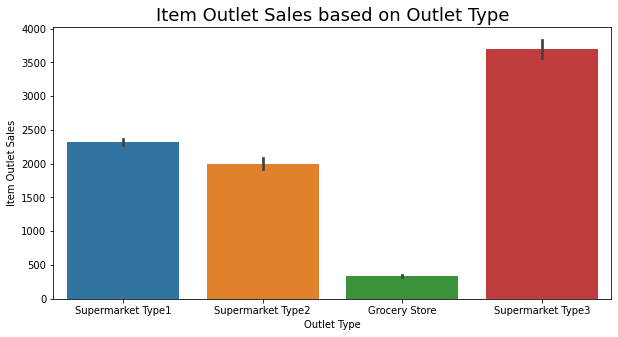

In [133]:
plt.figure(figsize = (10,5))
sns.barplot(data=sd, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Item Outlet Sales based on Outlet Type', fontsize = 18)
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales');
# EXPLANATION: The plot below shows that Supermarket type 3 have much more sale Than Type 1 or 2 , 
# and that Grocery stores have significanly less sales. I tis surprising that Supermarket type 2 ha sless sales than Type 1 though.

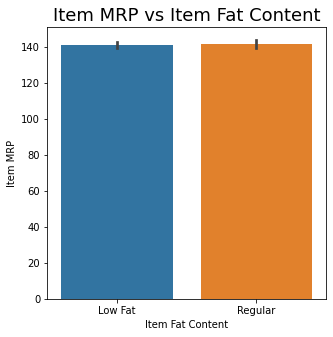

In [134]:
plt.figure(figsize = (5,5))
sns.barplot(data=sd, x='Item_Fat_Content', y='Item_MRP')
plt.title('Item MRP vs Item Fat Content', fontsize = 18)
plt.xlabel('Item Fat Content')
plt.ylabel('Item MRP');
# plt.legend();
# EXPLANATION : Maximum retail price (MRP) is a manufacturer calculated price that is the highest price that can be charged for a product
# The plot below shows that Low fat and regular fat items in general cost about the same so it is not more expensive to eat healthy.

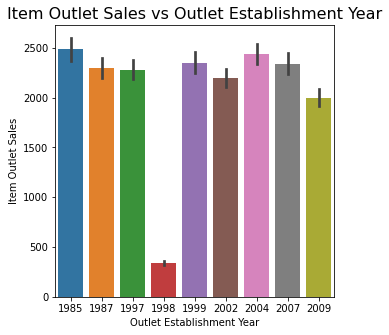

In [135]:
plt.figure(figsize = (5,5))
sns.barplot(data=sd, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title('Item Outlet Sales vs Outlet Establishment Year', fontsize = 16)
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales');
#EXPLANATION : The plot below shows that for the most part ( other than 1998 established stores) how long an store has been open does not have anything to to with the amount of sales it has
# for example I would have thought that older store are better known and may have more sales. 

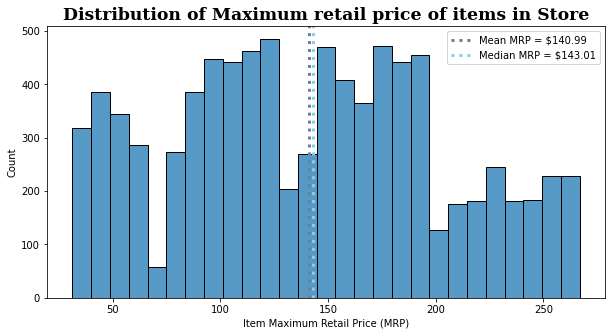

In [136]:
## Paste our visualization code, but use string formatting instead of rounding

## Make a larger fig/ax before plotting
fig, ax = plt.subplots(figsize=(10,5))

## Plot histogram
sns.histplot(data=sd, x='Item_MRP', ax=ax)

ax.set_title('Distribution of Maximum retail price of items in Store', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');

## Annotate mean and median
mean_price = sd['Item_MRP'].mean()
ax.axvline(mean_price, color='slategray', ls=':', lw=3,
           label=f'Mean MRP = ${mean_price:,.2f}');

med_price = sd['Item_MRP'].median()
ax.axvline(med_price, color='skyblue', ls=':', lw=3,
           label=f'Median MRP = ${med_price:,.2f}');
plt.xlabel('Item Maximum Retail Price (MRP)')
ax.legend();

#EXPLANTAION: The stores keep less count of the more expensive items (Over $200) compared to the cheap items.
# The items they keep most of in their inventory are the medium priced items les than $200 

#============================================================
#Project1 - Part 5 - Machine Learning
#Hirad Yazdankhah
#June 16 2022
#============================================================

### 0-Importing Libraries

In [137]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [138]:
df.duplicated().sum()
#sd[sd.duplicated(keep=False)] ===>used to remove duplicates if there were duplicates

0

In [139]:
# check for missing data
# note there are no missing data in the the "Item OUtlet Sales" so we do not need to delte any rows at this point
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Task 1- dentify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix. 

In [141]:
#Validation Split
# Assign the target column to y
y = df['Item_Outlet_Sales']
# Assign the features to X (In this case we include all columns except the target column)
X = df.drop(columns = 'Item_Outlet_Sales')

# Task 2 - Perform a train test split

In [142]:
# Train test split . WE reserve 30% of data for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.3)

# Task 3- Create a preprocessing object to prepare the dataset for Machine Learning

In [143]:
# WE see there are no inconsistencies in the categorical data :
# df['Manufacturer'].value_counts()

In [144]:
# Coumn Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [145]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [146]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [147]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [148]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f360551bb10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f360551ba90>)])

In [149]:
#Transformer Data
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f360551bb10>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f360551ba90>)])

In [150]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [151]:
#Inspect the Results

# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (5966, 1588)




array([[-1.23795688,  1.6066808 , -0.40189546, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.61657069, -1.00844167, -0.61928426, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        , -0.22706823, -0.20253536, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.1064099 , -0.91757329,  1.5257291 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.75894114, -0.22428724, -0.3811361 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.80980479, -0.95575131, -0.73573148, ...,  1.        ,
         0.        ,  0.        ]])